In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/james/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/james/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
train_file = 'train.csv'
medical_terms = 'wordlist.txt' # medcical terms from https://github.com/glutanimate/wordlist-medicalterms-en
out_file = 'train_medical.csv'

In [3]:
# load kaggle training q's (can load other sets of q's in this format as well)
quora_train = pd.read_csv(train_file)
# load medical terms
med_glossary = open(medical_terms).read().splitlines()
# convert glossary to set for faster lookups (?)
med_set = set(med_glossary)

In [5]:
'''function for filtering questions
stop words not removed because they have negligible effect on filtering quality'''
def filter_questions(df):
    # get set of words in each question ("bag of words")
    df['bow'] = df.question_text.apply(lambda x: set(re.sub("[^\w\d'\s]+",'',x).split()))
    
    # test which questions contain medical terms
    ix_to_keep = []
    for ix,row in df.iterrows():
        if len(row.bow & med_set) > 0.4*len(row.bow):
            ix_to_keep.append(ix)
    
    # subset df
    med_df = df.iloc[ix_to_keep,:]
    return med_df

In [6]:
quora_train_med = filter_questions(quora_train)

In [7]:
print('%d questions in initial set of questions' % quora_train.shape[0])
print('%d sincere (target) questions in initial set' % list(quora_train.target).count(0))
print('%d insincere (target) questions in initial set' % list(quora_train.target).count(1))
print('%d questions in filtered set of questions' % quora_train_med.shape[0])
print('%d sincere (target) questions in filtered set' % list(quora_train_med.target).count(0))
print('%d insincere (target) questions in filtered set' % list(quora_train_med.target).count(1))

1306122 questions in initial set of questions
1225312 sincere (target) questions in initial set
80810 insincere (target) questions in initial set
127914 questions in filtered set of questions
124522 sincere (target) questions in filtered set
3392 insincere (target) questions in filtered set


In [10]:
# write to file
quora_train_med[['qid','question_text','target']].to_csv(out_file, index=False)

Percent of insincere entries 2.652 %


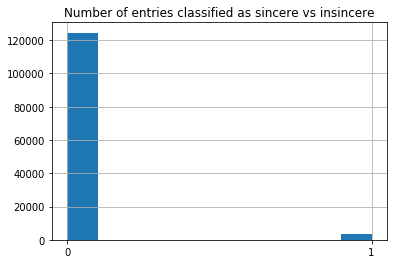

In [9]:
fig,ax = plt.subplots(1,1)
quora_train_med.hist(column = 'target', ax = ax)
ax.set_title('Number of entries classified as sincere vs insincere')
ax.set_xticks([0,1])
print('Percent of insincere entries %.3f %%'%(100*(sum(quora_train_med['target'])/len(quora_train_med))))